In [53]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [54]:
time_simulation = 5*10**-7
n_steps = 9903

In [59]:
with open('10to4_10000el/src_akantu_number_fragments.pickle', 'rb') as handle:
    nfrag = pickle.load(handle)
with open('10to4_10000el/src_akantu_avg_stress.pickle', 'rb') as handle:
    average_stress_bar = pickle.load(handle)
with open('10to4_10000el/src_akantu_var_epot.pickle', 'rb') as handle:
    varEpot = pickle.load(handle)
with open('10to4_10000el/src_akantu_var_ekin.pickle', 'rb') as handle:
    varEkin = pickle.load(handle)
with open('10to4_10000el/src_akantu_var_edis.pickle', 'rb') as handle:
    varEdis = pickle.load(handle)
with open('10to4_10000el/src_akantu_var_erev.pickle', 'rb') as handle:
    varErev = pickle.load(handle)
with open('10to4_10000el/src_akantu_var_econ.pickle', 'rb') as handle:
    varEcon = pickle.load(handle)
with open('10to4_10000el/src_akantu_var_wext.pickle', 'rb') as handle:
    varWext = pickle.load(handle)


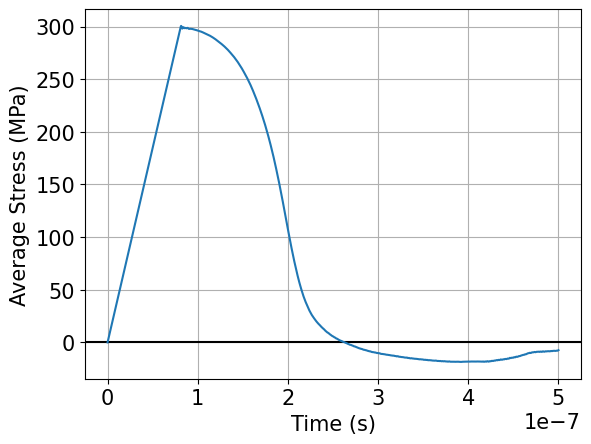

In [64]:
def PlotAverageStressBar(average_stress_bar, time_simulation, n_steps):
    """Plot a vector of values that corresponds to the average stress between all elements at eacth time step in the analysis"""

    hfont = {'fontname':'sans-serif'}
    fig, axes = plt.subplots()
    axes.grid(True, which='both')
    axes.axhline(y=0, color='k')
    # plt.title('Average stress bar', **hfont)
    plt.xlabel('Time (s)', **hfont)
    plt.ylabel('Average Stress (MPa)', **hfont)
    plt.rcParams.update({'font.size': 15})

    x = np.linspace(0, time_simulation, n_steps)
    y = average_stress_bar*10**-6 #From Pa to MPa
    plt.plot(x, y)
    plt.savefig("average_stress_bar_dynfrag_akantu.pdf")
    plt.show()

# PlotAverageStressBar(average_stress_bar, time_simulation, n_steps)

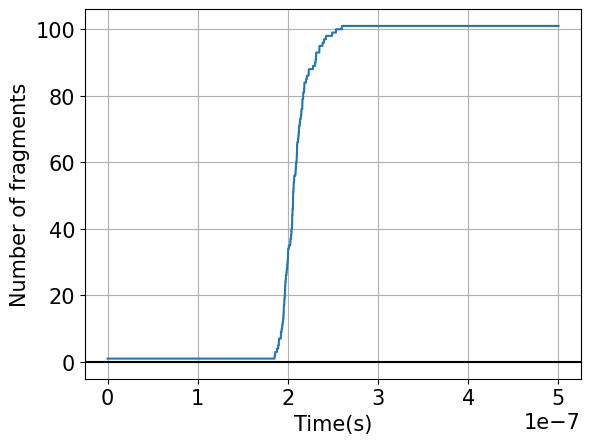

In [65]:
def PlotNumberFragments(nfrag, time_simulation, n_steps):
    """Plot a vector of values that corresponds to the number of fragments at eacth time step in the analysis"""

    hfont = {'fontname':'sans-serif'}
    fig, axes = plt.subplots()
    axes.grid(True, which='both')
    axes.axhline(y=0, color='k')
    # plt.title('Number of fragments', **hfont)
    plt.xlabel('Time(s)', **hfont)
    plt.ylabel('Number of fragments', **hfont)
    plt.rcParams.update({'font.size': 15})


    x = np.linspace(0, time_simulation, n_steps)
    y = nfrag
    plt.plot(x, y)
    # plt.savefig("number_fragments_dynfrag_akantu.svg")
    plt.savefig("number_fragments_dynfrag_akantu.pdf")
    plt.show()

# PlotNumberFragments(nfrag, time_simulation, n_steps)

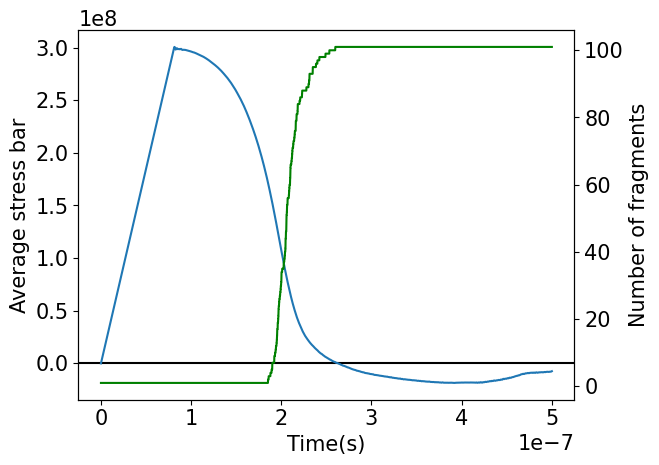

In [45]:
def PlotStressNumberFragments(stress, nfrag, time_simulation, n_steps):
    """Plot a vector of values that corresponds to the number of fragments at eacth time step in the analysis"""

    hfont = {'fontname':'sans-serif'}
    fig, ax1 = plt.subplots()
    # ax1.grid(True, which='both')
    ax1.axhline(y=0, color='k')
    ax2 = ax1.twinx()
    # plt.title('Number of fragments', **hfont)
    ax1.set_xlabel('Time(s)', **hfont)
    ax1.set_ylabel('Average stress bar', **hfont)
    ax2.set_ylabel('Number of fragments', **hfont)
    plt.rcParams.update({'font.size': 15})


    x = np.linspace(0, time_simulation, n_steps)
    y1 = stress
    y2 = nfrag

    ax1.plot(x, y1)
    ax2.plot(x, y2, color='green')

    # plt.savefig("number_fragments_dynfrag_akantu.svg")
    # plt.savefig("number_fragments_dynfrag_akantu.pdf")
    plt.show()

# PlotStressNumberFragments(average_stress_bar, nfrag, time_simulation, n_steps)

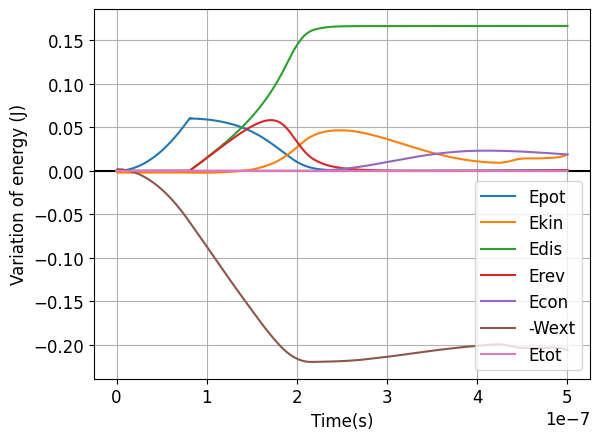

In [75]:
def PlotVarEnergy(varEpot, varEkin, varEdis, varErev, varEcon, varWext, varEtot, time_simulation, n_steps):
    """Plot variation of energy from time t to t0."""

    hfont = {'fontname':'sans-serif'}
    fig, axes = plt.subplots()
    axes.grid(True, which='both')
    axes.axhline(y=0, color='k')
    # plt.title('Variation of energy')
    plt.xlabel('Time(s)', **hfont)
    plt.ylabel('Variation of energy (J)', **hfont)
    plt.rcParams.update({'font.size': 12})

    x = np.linspace(0, time_simulation, n_steps)
    plt.plot(x, varEpot, label='Epot')
    plt.plot(x, varEkin, label='Ekin')
    plt.plot(x, varEdis, label='Edis')
    plt.plot(x, varErev, label='Erev')
    plt.plot(x, varEcon, label='Econ')
    plt.plot(x, -varWext, label='-Wext')
    plt.plot(x, varEtot, label='Etot')
    plt.legend(loc='lower right')
    plt.savefig("var_energies_dynfrag_akantu.pdf")
    plt.show()

varEtot = varEtot = np.zeros(n_steps)
for n in range(1,n_steps):
    varEtot[n] = varWext[n] - (varEpot[n] + varEkin[n] + varEdis[n]  + varErev[n] + varEcon[n])
    
PlotVarEnergy(varEpot, varEkin, varEdis, varErev, varEcon, varWext, varEtot, time_simulation, n_steps)